In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Binary: chỉ lấy class 0 và 1 cho dễ nhìn metrics
data = load_iris()
X, y = data.data, data.target
X_bin = X[y != 2]
y_bin = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(
    X_bin, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


Accuracy: 1.0000 (100.00%)
Confusion matrix:
 [[10  0]
 [ 0 10]]


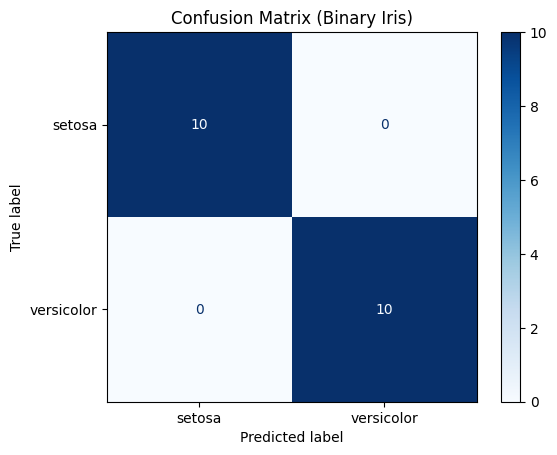

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f} ({acc*100:.2f}%)")

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names[:2])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Binary Iris)')
plt.show()
